Demo #1: Read and pre-process data

Import libraries

In [ ]:
import sys
import os
from pathlib import Path
project_root = Path.cwd().resolve().parents[1]
sys.path.append(str(project_root))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from canari import DataProcess, plot_data

Read .DAT file from Hydro-Quebec's database using pandas

In [4]:
data_file = str(project_root / "data" / "demo_data" / "LGA001EFAPRG910.DAT")

df_raw = pd.read_csv(
        data_file,
        sep=";",  # Semicolon as delimiter
        quotechar='"',  
        engine="python",  
        na_values=[""],  # Treat empty strings as NaN
        skipinitialspace=True,  
        encoding="ISO-8859-1",
    )
df_raw.head()

,No extensometre,Amenagement,Ouvrage,Unnamed: 3,Date,Nombre Date,Ext/Contraction (mm),Remarque,Niveau reservoir (m),Memo,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,LGA001EFAPRG910,LGA,LGABAR,NaN,2001-09-06 00:00,37140.0,3.27,NaN,31.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LGA001EFAPRG910,LGA,LGABAR,NaN,2001-09-07 00:00,37141.0,3.27,NaN,31.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LGA001EFAPRG910,LGA,LGABAR,NaN,2001-09-08 00:00,37142.0,3.26,NaN,31.15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LGA001EFAPRG910,LGA,LGABAR,NaN,2001-09-09 00:00,37143.0,3.24,NaN,31.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LGA001EFAPRG910,LGA,LGABAR,NaN,2001-09-10 00:00,37144.0,3.22,NaN,31.22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Choose variables

In [5]:
df = df_raw.iloc[1:,[6]]
time = pd.to_datetime(df_raw.iloc[1:, 4])
df.index = time
df.index.name = "time"
df.columns = ["crack opening"]
df.head()

,crack opening
time,
2001-09-07,3.27
2001-09-08,3.26
2001-09-09,3.24
2001-09-10,3.22
2001-09-11,3.23


Plot original data

Text(0.5, 1.0, 'Orginal data')

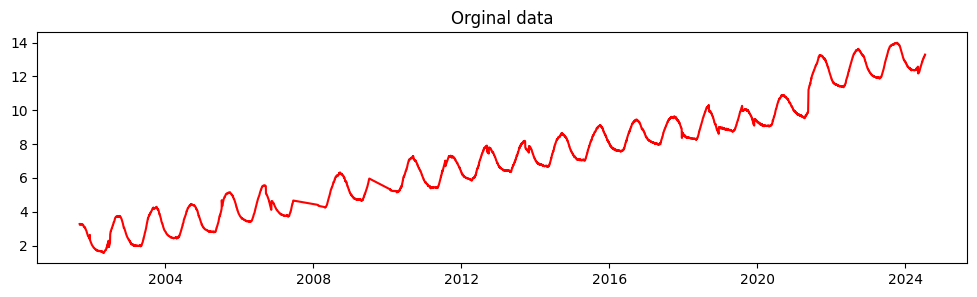

In [6]:
fig = plt.subplots(figsize=(12, 3))
plt.plot(df.index, df.values, color="r")
plt.title("Orginal data")

Preprocessing:
 - Remove outliers
 - Resampling

Use external libraries -> User's choise -> flexibile

Resampling using pandas. User's choice for interpolation methods.

In [7]:
df = df.resample("W").mean()
df.head()

,crack opening
time,
2001-09-09,3.256667
2001-09-16,3.235714
2001-09-23,3.255714
2001-09-30,3.240000
2001-10-07,3.238571


Plot resampled (weekly) data

Text(0.5, 1.0, 'Resample (weekly) data')

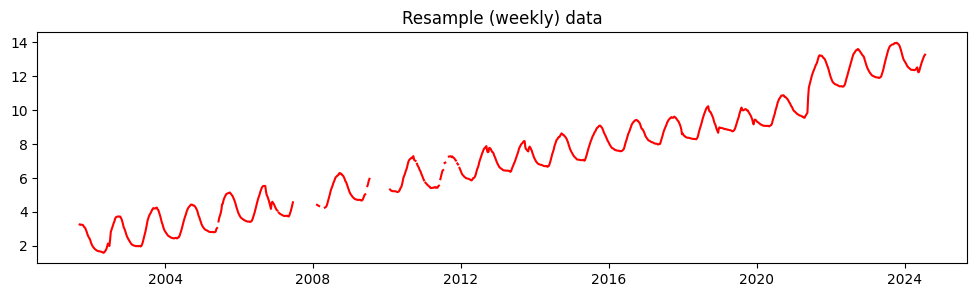

In [8]:
fig = plt.subplots(figsize=(12, 3))
plt.plot(df.index, df.values, color="r")
plt.title("Resample (weekly) data")

Preprocessing:
- Add time covariates to data for later analyses
- Normalization/Unnormalization
- Split data into train, validation, and test sets

Using canari. The input is of dataframe type. 



In [9]:
data_processor = DataProcess(
    data=df,
    time_covariates=["week_of_year"],
    train_split=0.5,
    validation_split=0.2,
    normalization=True,
    output_col=[0],
)
train_data, validation_data, test_data, _ = data_processor.get_splits()


In [10]:
data_processor.data.head()

,crack opening,week_of_year
time,,
2001-09-09,3.256667,36.0
2001-09-16,3.235714,37.0
2001-09-23,3.255714,38.0
2001-09-30,3.240000,39.0
2001-10-07,3.238571,40.0


Plot data using canari

Text(0.5, 1.0, 'Train/Validation/Test sets. Unnormalized')

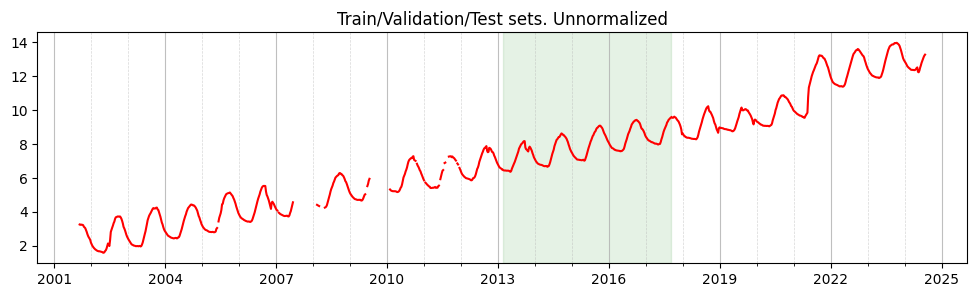

In [11]:
fig = plt.subplots(figsize=(12, 3))
plot_data(data_processor=data_processor, normalization=False)
plt.title("Train/Validation/Test sets. Unnormalized")

Text(0.5, 1.0, 'Train/Validation/Test sets. Normalized')

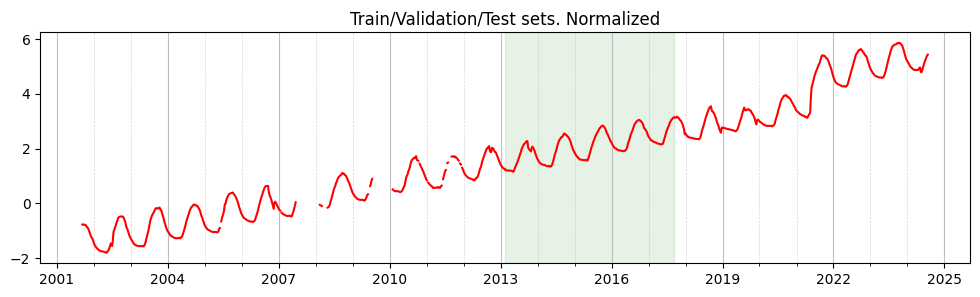

In [12]:
fig = plt.subplots(figsize=(12, 3))
plot_data(data_processor=data_processor, normalization=True)
plt.title("Train/Validation/Test sets. Normalized")